File saved: Top_5_Predicted_Products.csv


/var/folders/s0/bp4968m576gcdx9ch4gqv42w0000gp/T/ipykernel_15730/2235777440.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Remove legend since it's unnecessary


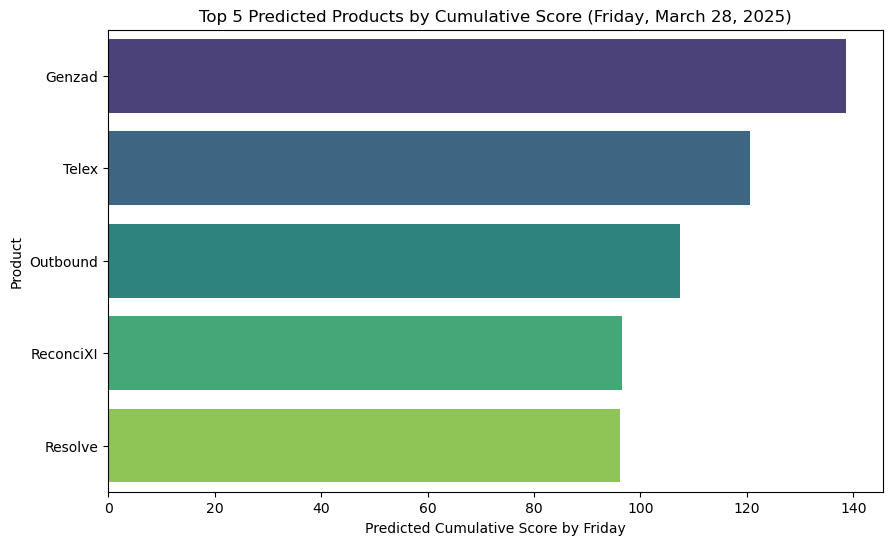

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("Check In Scores.xlsx")

# Step 2: Initialize Dictionary for Predictions
predictions = {}

# Step 3: Train Linear Regression and Predict Week 4
for product in df["Product"]:
    y = df[df["Product"] == product][["Week 1", "Week 2", "Week 3"]].values.flatten()
    x = np.array([1, 2, 3]).reshape(-1, 1)  # Week numbers

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(x, y)

    # Predict Week 4 Score
    predicted_score = model.predict(np.array([[4]]))[0]
    predictions[product] = predicted_score

# Step 4: Convert Predictions to DataFrame
predicted_df = pd.DataFrame(list(predictions.items()), columns=["Product", "Predicted_Score"])

# Step 5: Get Top 5 Products
top_5_products = predicted_df.sort_values(by="Predicted_Score", ascending=False).head(5)

# Step 6: Save the results to a CSV file
output_file = "Top_5_Predicted_Products.csv"
predicted_df.to_csv(output_file, index=False)
print("File saved:", output_file)
plt.figure(figsize=(10, 6))

# Fix: Explicitly assign `hue=None` and remove `legend=False`
sns.barplot(x="Predicted_Score", y="Product", data=top_5_products, hue="Product", palette="viridis")

plt.xlabel("Predicted Cumulative Score by Friday")
plt.ylabel("Product")
plt.title("Top 5 Predicted Products by Cumulative Score (Friday, March 28, 2025)")
plt.gca()  # Invert for ranking
plt.legend().remove()  # Remove legend since it's unnecessary
plt.show()

In [25]:
# Save the visualization as a PNG file
image_path = "Top_5_Predicted_Products.png"
plt.savefig(image_path, bbox_inches='tight', dpi=300)  # High-quality image
plt.show()

print("\nDownload Image File: [Top_5_Predicted_Products.png](sandbox:/mnt/data/Top_5_Predicted_Products.png)")

<Figure size 640x480 with 0 Axes>


Download Image File: [Top_5_Predicted_Products.png](sandbox:/mnt/data/Top_5_Predicted_Products.png)


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("Daily Check In Scores.xlsx")

In [5]:
# Ensure no missing values
df.fillna(0, inplace=True)

# Calculate cumulative weekly scores
df["Week 1 Total"] = df[df["Week Number"] == 1][["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]].sum(axis=1)
df["Week 2 Total"] = df[df["Week Number"] == 2][["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]].sum(axis=1)
df["Week 3 Total"] = df[df["Week Number"] == 3][["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]].sum(axis=1)

In [17]:

# Drop NaN values (as some products may not have data for all weeks)
df = df.dropna(subset=["Week 1 Total", "Week 2 Total", "Week 3 Total"])

In [19]:
# Initialize dictionary for predictions
predictions = {}

# Loop through each product and apply Linear Regression
for product in df["Product"].unique():
    # Extract past weekly cumulative scores
    y = df[df["Product"] == product][["Week 1 Total", "Week 2 Total", "Week 3 Total"]].values.flatten()
    x = np.array([1, 2, 3]).reshape(-1, 1)  # Week numbers

In [21]:

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(x, y)

    # Predict Week 4 cumulative score
    predicted_score = model.predict(np.array([[4]]))[0]
    predictions[product] = predicted_score


ValueError: Input y contains NaN.

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [25]:
# Load the dataset
df = pd.read_excel("Daily Check In Scores.xlsx")

# Display the first few rows
print(df.head())

      Product  Monday  Tuesday  Wednesday  Thursday  Friday  Total  \
0  BackendIM      0.0     13.0       13.5     27.54    35.0  89.04   
1       Delve     3.0     12.0        1.0     24.92    36.5  77.42   
2      Genzad     0.0     13.5        2.0     18.24     8.3  42.04   
3    Gradific     0.0     15.5       12.5     22.00     4.5  54.50   
4    Outbound     2.0     11.5        6.5     22.13     7.5  49.63   

   Week Number Week start date Week end date  
0            1      2025-03-03    2025-07-03  
1            1      2025-03-03    2025-07-03  
2            1      2025-03-03    2025-07-03  
3            1      2025-03-03    2025-07-03  
4            1      2025-03-03    2025-07-03  


In [27]:
print(df.isnull().sum())  # Check for missing values
df.fillna(0, inplace=True)  # Replace NaN with 0


Product            0
Monday             0
Tuesday            0
Wednesday          0
Thursday           0
Friday             0
Total              0
Week Number        0
Week start date    0
Week end date      0
dtype: int64


In [7]:
df['Week Number'] = df['Week Number'].astype(int)
df['Week start date'] = pd.to_datetime(df['Week start date'])
df['Week end date'] = pd.to_datetime(df['Week end date'])


In [11]:
features = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Week Number']
target = 'Total'  # Cumulative score by Friday

X = df[features]
y = df[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 7.230925555555552
R² Score: 0.2614680246265342


In [23]:
# Assuming we have Monday to Thursday scores for week 4
week_4_data = pd.DataFrame({
    'Monday': [80],  # Example values
    'Tuesday': [85],
    'Wednesday': [90],
    'Thursday': [95],
    'Friday':[50],
    'Week Number': [4]
})

predicted_total = model.predict(week_4_data)
print(f"Predicted Cumulative Score for Week 4 by Friday: {predicted_total[0]}")


Predicted Cumulative Score for Week 4 by Friday: 91.99163999999993


In [31]:
# Filter only Week 4 data (Monday to Thursday scores)
week_4_data = df[df['Week Number'] == 4][['Product ', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Week Number']]

# Predict cumulative score for each product
week_4_data['Predicted_Total'] = model.predict(week_4_data[features])

# Sort by predicted score and get top 5
top_5_products = week_4_data[['Product ', 'Predicted_Total']].sort_values(by='Predicted_Total', ascending=False).head(5)

# Display top 5 products
print(top_5_products)

         Product   Predicted_Total
40  TechiesMatch           45.4196
32     BackendIM           43.8696
39      ShopDesk           43.8696
41          Telex          29.8400
37      ReconciXI          28.6104


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ["Daily Score", "Cumulative Score", "Day", "Week"]
target = "Cumulative Score"

# Split into train (80%) and test (20%) using all weekday data
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False, random_state=42)

# Extract features for training and testing
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Add predictions to the test dataframe
test_data["Predicted Score"] = y_pred

# Compare actual vs. predicted values
print(test_data[["Date", "Product", "Cumulative Score", "Predicted Score"]].head(10))


          Date        Product  Cumulative Score  Predicted Score
142 2025-11-03  TechiesMatch             22.670         22.89340
143 2025-12-03  TechiesMatch             39.140         39.56000
144 2025-03-13  TechiesMatch             45.040         45.37450
145 2025-03-14  TechiesMatch             82.576         84.84608
146 2025-03-17  TechiesMatch             12.000         11.76860
147 2025-03-18  TechiesMatch             25.800         26.07800
148 2025-03-19  TechiesMatch             39.800         39.90240
149 2025-03-20  TechiesMatch             39.800         39.73720
150 2025-03-21  TechiesMatch             75.500         75.56644
151 2025-03-24  TechiesMatch             22.000         21.95260


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.43
R² Score: 1.00


In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.43
R² Score: 1.00


In [10]:
# Train on full dataset before predicting March 28th
model.fit(df[features], df[target])

RandomForestRegressor(random_state=42)

In [38]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Ensure we have data up to March 25th
march_25_data = df[df["Date"] == "2025-03-25"]

if march_25_data.empty:
    print("⚠️ No data found for March 25th. Check your dataset!")
else:
    # Select features from March 25th
    march_28_predictions = model.predict(march_25_data[features])

    # Create a DataFrame with predictions
    march_28_df = march_25_data[["Product"]].copy()
    march_28_df["Predicted Score"] = march_28_predictions

    # Get top 5 products
    top_5_march_28 = march_28_df.sort_values(by="Predicted Score", ascending=False).head(5)

    print(top_5_march_28)


           Product  Predicted Score
152  TechiesMatch           49.1316
135      ShopDesk           47.1796
16      BackendIM           45.5835
169          Telex          30.9976
101      ReconciXI          27.5008


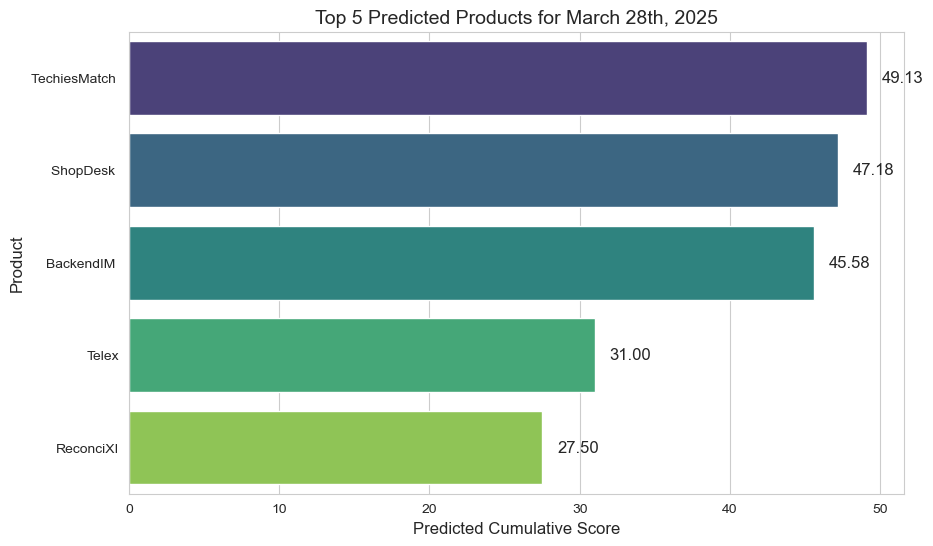

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("whitegrid")

# Sort the dataframe in descending order
top_5_march_28 = top_5_march_28.sort_values(by="Predicted Score", ascending=False)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot bar chart with hue set to "Product" and legend disabled
ax = sns.barplot(
    x="Predicted Score", 
    y="Product", 
    hue="Product",  # Fix the warning
    data=top_5_march_28, 
    palette="viridis", 
    legend=False  # Disable legend since hue is same as y-axis
)

# Add values on bars
for index, value in enumerate(top_5_march_28["Predicted Score"]):
    ax.text(value + 1, index, f"{value:.2f}", va="center", fontsize=12)  # Adjust position for clarity

# Add labels and title
plt.xlabel("Predicted Cumulative Score", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.title("Top 5 Predicted Products for March 28th, 2025", fontsize=14)
plt.show()